In [31]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import fashion_mnist
from tensorflow.keras import models, layers
from tensorflow.keras.applications import VGG16

In [32]:
(x_train, y_train), (x_test, y_test)  = fashion_mnist.load_data()
x_train = tf.image.resize(x_train[..., np.newaxis], (32, 32))
x_train = np.repeat(x_train, 3, -1)
x_test = tf.image.resize(x_test[..., np.newaxis], (32, 32))
x_test = np.repeat(x_test, 3, -1)

x_train, x_test = x_train / 255., x_test / 255.

In [33]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

In [30]:
# learning_rate = 0.001
# training_steps = 30
# batch_size = 300

In [34]:
model = tf.keras.Sequential([
    conv_base,
    layers.Flatten(),
    tf.keras.layers.Dense(512, activation = tf.nn.relu),
    layers.Dropout(0.33),
    tf.keras.layers.Dense(256, activation = tf.nn.relu),
    layers.Dropout(0.33),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)#sigmoid)
 ])

In [35]:
model.compile(
    #loss = tf.keras.losses.MeanSquaredError(),
    #loss = tf.keras.losses.BinaryCrossentropy(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    #optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate),
    metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_data = (x_test, y_test), validation_split = 0.2)

Epoch 1/10
938/938 [==============================] - 14s 13ms/step - loss: 0.5860 - accuracy: 0.7877 - val_loss: 0.4436 - val_accuracy: 0.8344
Epoch 2/10
938/938 [==============================] - 13s 14ms/step - loss: 0.4423 - accuracy: 0.8387 - val_loss: 0.4208 - val_accuracy: 0.8462
Epoch 3/10
938/938 [==============================] - 13s 14ms/step - loss: 0.4090 - accuracy: 0.8497 - val_loss: 0.4027 - val_accuracy: 0.8516
Epoch 4/10
938/938 [==============================] - 12s 13ms/step - loss: 0.3865 - accuracy: 0.8561 - val_loss: 0.3791 - val_accuracy: 0.8606
Epoch 5/10
938/938 [==============================] - 12s 13ms/step - loss: 0.3723 - accuracy: 0.8620 - val_loss: 0.3673 - val_accuracy: 0.8648
Epoch 6/10
938/938 [==============================] - 13s 14ms/step - loss: 0.3596 - accuracy: 0.8665 - val_loss: 0.3718 - val_accuracy: 0.8643
Epoch 7/10
938/938 [==============================] - 13s 14ms/step - loss: 0.3495 - accuracy: 0.8684 - val_loss: 0.3625 - val_accuracy:

In [36]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.3475 - accuracy: 0.8745


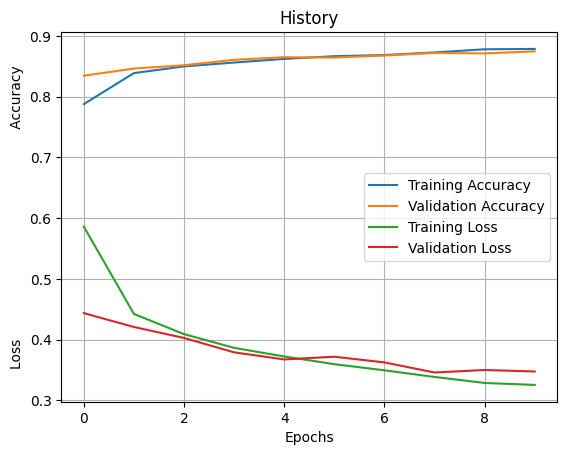

In [37]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss                                                Accuracy")
plt.title("History")
plt.grid()
plt.legend()
plt.show()

In [38]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = True

In [39]:
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [40]:
model_1 = tf.keras.Sequential([
    conv_base,
    layers.Flatten(),
    tf.keras.layers.Dense(512, activation = tf.nn.relu),
    layers.Dropout(0.33),
    tf.keras.layers.Dense(256, activation = tf.nn.relu),
    layers.Dropout(0.33),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)#sigmoid)
 ])

In [41]:
model_1.compile(
    #loss = tf.keras.losses.MeanSquaredError(),
    #loss = tf.keras.losses.BinaryCrossentropy()
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    #optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate),
    metrics = ['accuracy'])

history_1 = model_1.fit(x_train, y_train, epochs = 15, validation_data = (x_test, y_test), validation_split = 0.2)# batch_size = 64,

Epoch 1/15
1875/1875 [==============================] - 33s 16ms/step - loss: 0.5012 - accuracy: 0.8284 - val_loss: 0.4050 - val_accuracy: 0.8715
Epoch 2/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3549 - accuracy: 0.8789 - val_loss: 0.3528 - val_accuracy: 0.8814
Epoch 3/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3288 - accuracy: 0.8905 - val_loss: 0.3243 - val_accuracy: 0.8879
Epoch 4/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2966 - accuracy: 0.8992 - val_loss: 0.3236 - val_accuracy: 0.8966
Epoch 5/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2839 - accuracy: 0.9042 - val_loss: 0.3535 - val_accuracy: 0.8841
Epoch 6/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2722 - accuracy: 0.9057 - val_loss: 0.3231 - val_accuracy: 0.8867
Epoch 7/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2641 - accuracy: 0.9100 - val_loss: 0.3029 -

In [42]:
test_loss, test_accuracy = model_1.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.3138 - accuracy: 0.9073


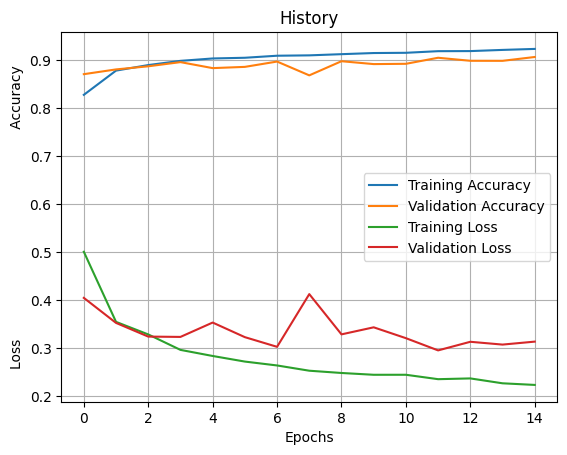

In [43]:
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss                                                Accuracy")
plt.title("History")
plt.grid()
plt.legend()
plt.show()

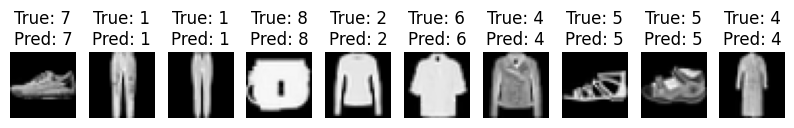

In [55]:
import random

random_indices = random.sample(range(len(x_test)), 10)
test_image = x_test[random_indices]
test_labels = y_test[random_indices]

predict = model_1(test_image)
predict_labels = tf.argmax(predict, axis=1)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(test_image[i].reshape((32, 32, 3)))
    plt.title(f"True: {test_labels[i]}\nPred: {predict_labels[i]}")
    plt.axis('off')

Згорткова нейромережа, що використовує VGG16 в якості згорткової основи показала не набагато кращі показники (loss: 0.2235 - accuracy: 0.9241 - val_loss: 0.3138 - val_accuracy: 0.9073) порівняно з показниками точності (loss: 0.2018 - accuracy: 0.9236 - val_loss: 0.3096 - val_accuracy: 0.8978) багатошарової мережі. На прикладі даного дата сету мені довелося використати доволі багато часу, щоб підняти показники точності як багатошарової нейромережі, так і згортковій VGG16.